# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de Imagens</b></center></font>
  
<font size="3"><center>Prof. Renato Moraes Silva</center></font>
<br/>

# <center>Exercício - Introdução à bilioteca OpenCV</center>

Neste exercício, são apresentados alguns recursos básicos da biblioteca OpenCV.

Para instalar a biblioteca OpenCV no sistema operacional Ubuntu, use o comando ```sudo apt-get install python3-opencv```.

Além disso, é preciso instalar a biblioteca no Python, por meio do comando ```pip install opencv-python```.

Abaixo, iremos importar as bibliotecas que serão usadas.

In [1]:
# -*- coding: utf-8 -*-

import cv2 
import numpy as np
import os
import urllib.request
import matplotlib.pyplot as plt # para plotar as imagens

# Importanto uma imagem em tons de cinza

Primeiro, iremos fazer o download de uma imagem.

In [2]:
pathFolder = 'figs/'

# verifica que a pasta existe
if not os.path.exists(pathFolder):
    # cria a pasta
    os.makedirs(pathFolder)

url = 'https://i.dailymail.co.uk/i/pix/2012/06/22/article-2163232-13BB4A21000005DC-80_634x472.jpg'

urllib.request.urlretrieve(url, pathFolder + "gatoVaca.png")  

('figs/gatoVaca.png', <http.client.HTTPMessage at 0x7f7cd45e1550>)

Iremos importar a imagem da pasta figs em tons de cinza. Para isso, é necessário usar a função *imread*, passando o path da imagem e 0 como argumento.

In [3]:
# abrindo a imagem em tons de cinza
imagem = cv2.imread("figs/gatoVaca.png", 0)

print("Altura (height): %d pixels" % (imagem.shape[0]) )
print("Largura (width): %d pixels" % (imagem.shape[1]) )

# quantidade de canais
if len(imagem.shape)==2:
    print("Qtd. de canais: 1")
elif len(imagem.shape)==3:
    print("Qtd. de canais: %d" %(imagem.shape[-1]))
    
print(imagem[0:2])

Altura (height): 472 pixels
Largura (width): 634 pixels
Qtd. de canais: 1
[[ 20  24  22 ... 123 124 127]
 [ 25  28  24 ... 155 160 128]]


Para mostrar a imagem na tela, podemos usar a função *imshow()* da biblioteca OpenCV. 

E devemos acrescentar também: 

```
cv2.waitKey(0) # espera até que um tecla seja pressionada
cv2.destroyAllWindows() # destrói a janela onde a imagem está sendo exibida
```

No entanto, exibir a imagem usando OpenCV pode travar o notebook. Portanto, é melhor usar a função imgshow da biblioteca *matplotlib*, passando 'gray', vmin=0 e vmax=255 como argumentos. 

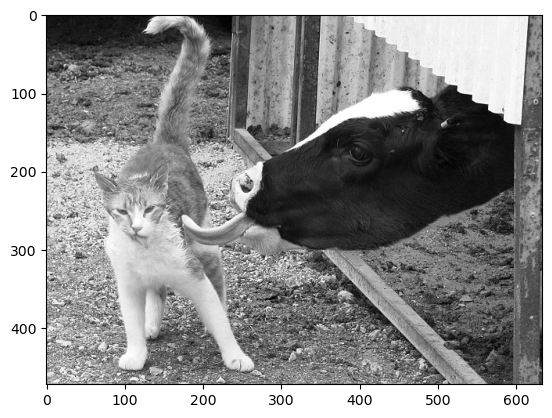

In [51]:
# como plotar usando a biblioteca opencv
#cv2.startWindowThread()
#cv2.imshow('Título da imagem', imagem)
#cv2.waitKey(0) # espera até que um tecla seja pressionada
#cv2.destroyAllWindows() # destrói a janela onde a imagem está sendo exibida

# plotar usando a biblioteca matplotlib
plt.imshow(imagem, 'gray', vmin=0, vmax=255)

plt.show()

# Importanto uma imagem em BGR

Agora, iremos importar uma imagem da pasta figs usando cores. É importante notar que a biblioteca OpenCV importa as imagens com o formato BGR. Portanto, para algumas tarefas será necessário converter para RGB, por meio da função *cvtColor*, usando o argumento *cv2.COLOR_BGR2RGB*.

In [78]:
# abrindo a imagem em BGR
imagem = cv2.imread("figs/gatoVaca.png")

# quando abrimos uma imagem com imread, as cores vem em BGR. Abaixo vamos mudar para RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

print("Altura (height): %d pixels" % (imagem.shape[0]) )
print("Largura (width): %d pixels" % (imagem.shape[1]) )

# quantidade de canais
if len(imagem.shape)==2:
    print("Qtd. de canais: 1")
elif len(imagem.shape)==3:
    print("Qtd. de canais: %d" %(imagem.shape[-1]))

print(imagem[0:2])

Altura (height): 472 pixels
Largura (width): 634 pixels
Qtd. de canais: 3
[[[ 21  20  16]
  [ 25  24  20]
  [ 23  22  18]
  ...
  [123 124 119]
  [127 123 120]
  [130 127 122]]

 [[ 26  25  21]
  [ 29  28  24]
  [ 25  24  20]
  ...
  [156 155 151]
  [163 160 155]
  [132 127 121]]]


Agora, iremos mostrar a imagem na tela usando a função *imshow* da biblioteca matplotlib

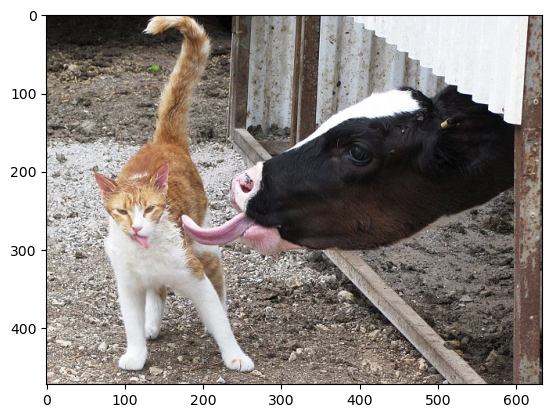

In [79]:
# plotar usando a biblioteca matplotlib
plt.imshow(imagem)
plt.show()

Vamos modificar a imagem acima, adicionando um retângulo preto de 5x5 pixels a cada 20 pixels.

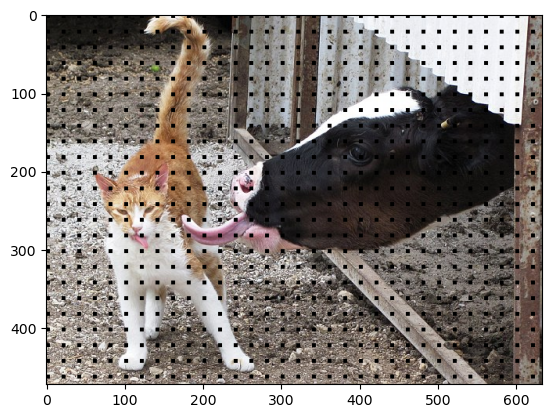

In [80]:
altura = imagem.shape[0]
largura = imagem.shape[1]

for i in range(0, altura, 20):
    for j in range(0, largura, 20):
        
        imagem[i:i+5,j:j+5,:] = [0,0,0]
  
# plotar usando a biblioteca matplotlib
plt.imshow(imagem)
plt.show()

A biblioteca OpenCV também permite salvar uma imagem em arquivo, usando qualquer formato desejado. Para isso, basta usar a função *imwrite*, passando o *path* da imagem, seguido pela variável que contém a imagem. 

Abaixo, salve a imagem com o nome *gatoVaca_copia.jpg*.

In [81]:
# Salvar a imagem 
cv2.imwrite("figs/gatoVaca_copia.jpg", imagem)

True

É possível também inserir texto nas imagens usando a função **putText** que possui os seguintes parâmetros:
- **img**: imagem
- **text**: texto desejado
- **org**: coordenadas no formato (x,y) onde o texto deve ser inserido
- **fontFace**: o tipo de fonte. Exemplos: FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, FONT_HERSHEY_DUPLEX, etc
- **fontScale**: inteiro que indica a escala da fonte e é usado para aumentar ou diminuir a fonte
- **color**: cor no formato BGR
- **thickness** (opcional): espessura das linha
- **lineType** (opcional): tipo de linha. Opções: FILLED, LINE_4, LINE_8, LINE_AA
- **bottomLeftOrigin** (opcional): o valor False mantém o texto normal, enquanto que o True, inverte o texto

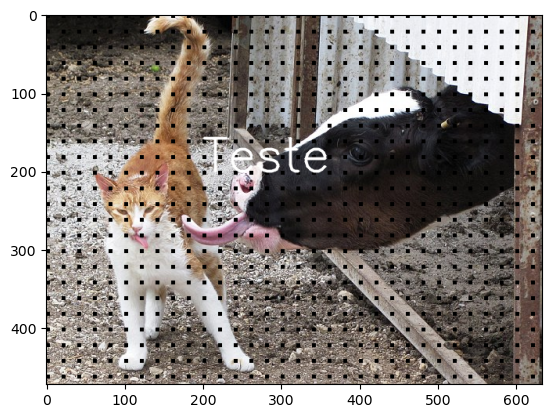

In [84]:
imagem = cv2.putText(imagem,"Teste",(200,200),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2,cv2.LINE_AA)

# plotar usando a biblioteca matplotlib
plt.imshow(imagem)
plt.show()

## Exercícios

**Ex. 1**. Use a imagem em tons de cinza e acrescente uma borda preta ao redor dela usando operações matriciais por meio da biblioteca NumPy. 

Salve a imagem resultante com o nome *gatoVaca_borda.png* no pasta *figs*.

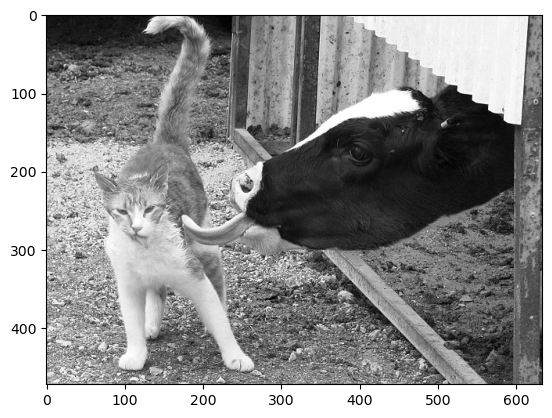

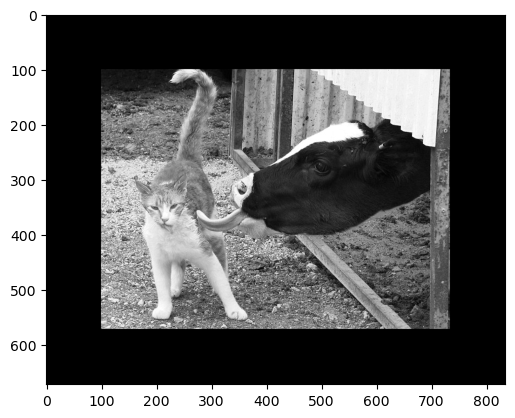

True

In [85]:
# abrindo a imagem em BGR
imagem = cv2.imread("figs/gatoVaca.png", 0)

# plotar usando a biblioteca matplotlib
plt.imshow(imagem, 'gray', vmin=0, vmax=255)
plt.show()

altura = imagem.shape[0]
largura = imagem.shape[1]

novaImg = np.zeros( [altura+200, largura+200] )

novaImg[100:100+altura,100:100+largura] = imagem

# plotar usando a biblioteca matplotlib
plt.imshow(novaImg, 'gray', vmin=0, vmax=255)
plt.show()

# Salvar a imagem 
cv2.imwrite("figs/gatoVaca_borda.jpg", imagem)

**Ex. 2**. Usando a imagem em tons de cinza, crie uma nova imagem com zoom na cabeça da vaca. Isto é, recorte a imagem para que sobre apenas a região onde está a cabeça da vaca.

Salve a imagem resultante com o nome *gatoVaca_zoom.png* no pasta *figs*.

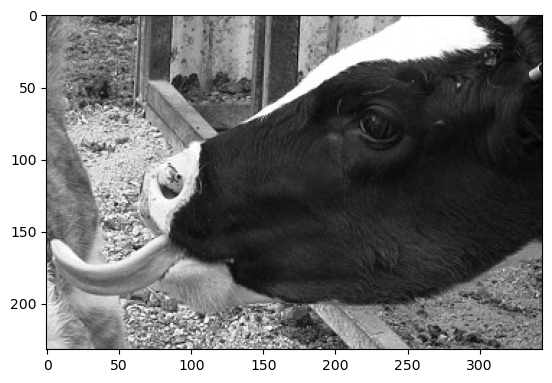

True

In [86]:
imgZoom = imagem[ 100:-140,170:-120]

# plotar usando a biblioteca matplotlib
plt.imshow(imgZoom, 'gray', vmin=0, vmax=255)
plt.show()

# Salvar a imagem 
cv2.imwrite("figs/gatoVaca_zoom.jpg", imagem)